In [1]:
import pandas as pd 
import numpy as np

In [2]:
spotify_df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
spotify_copy = spotify_df.copy()

In [4]:
spotify_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
X_features = list(spotify_copy.columns)
X_features

['genre',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

In [6]:
categorical_features = ['genre', 'artist_name', 'track_name', 'key', 'mode']

In [7]:
from sklearn.preprocessing import LabelEncoder

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
python(25364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [8]:
label_encoder = LabelEncoder()

In [9]:
for column in categorical_features:
    spotify_copy[column] = label_encoder.fit_transform(spotify_copy[column])
spotify_copy.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,5181,18348,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,4/4,0.814
1,15,8254,92963,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,4/4,0.816
2,15,6451,32194,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,5/4,0.368
3,15,5181,30998,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,4/4,0.227
4,15,4074,90793,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,4/4,0.390


In [10]:
X_features.remove('popularity')
X_features.remove('time_signature')
X_features.remove('track_id')
X_features

['genre',
 'artist_name',
 'track_name',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [11]:
Y = spotify_copy.popularity
X = spotify_copy[X_features]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#standardizing the variables to bring all the variables into one scale
from sklearn.preprocessing import StandardScaler
X_Scaler = StandardScaler()
X_Scaled = X_Scaler.fit_transform(X)
Y_Scaler = StandardScaler()
Y = Y.to_numpy()
Y = Y.reshape(-1,1)
Y_Scaled = Y_Scaler.fit_transform(Y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, Y_Scaled, test_size= 0.2, random_state= 42)

In [15]:
from sklearn.linear_model import LinearRegression
linearig = LinearRegression()
alinear_model = linearig.fit(X_train, y_train)

In [16]:
column_coef_df = pd.DataFrame({'columns': X.columns, 'coef': linearig.coef_.flatten()})

In [17]:
sorted_coef_vals = column_coef_df.sort_values('coef', ascending= False)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Features')

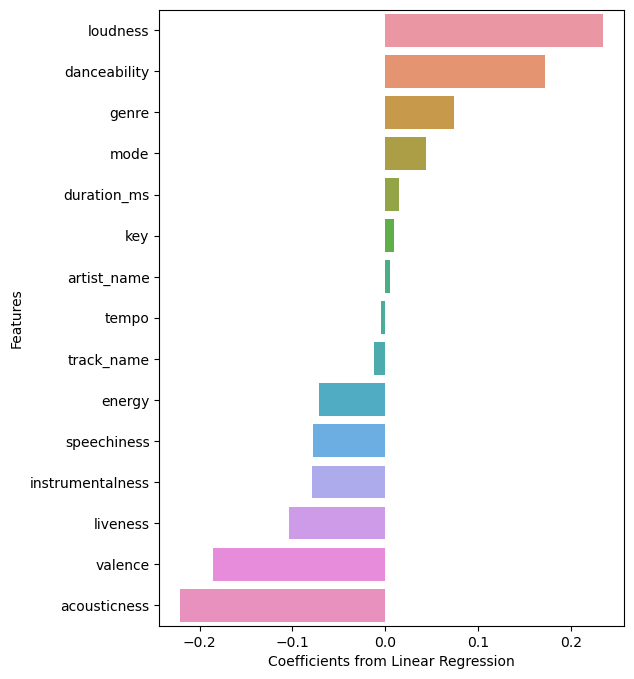

In [19]:
plt.figure(figsize= (6,8))
sn.barplot(x= 'coef', y= 'columns', data= sorted_coef_vals)
plt.xlabel('Coefficients from Linear Regression')
plt.ylabel('Features')
#this plot shows that loudness, danceability and genre are the top factors to decide the popularity

In [20]:
#calculating rmse
from sklearn.metrics import mean_squared_error
def get_train_test_rmse(model):
    y_train_pred = model.predict(X_train)
    rmse_train = round(np.sqrt(mean_squared_error(y_train, y_train_pred)),3)
    y_test_pred = model.predict(X_test)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3)
    print('train', rmse_train, 'test', rmse_test)

In [21]:
get_train_test_rmse(alinear_model)#the model looks good with similar train and test rmse. However, we can see 
#whether it can improve further

train 0.87 test 0.873


In [22]:
#applying regularization through ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 1, max_iter= 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [23]:
get_train_test_rmse(ridge)

train 0.87 test 0.873


In [24]:
ridge = Ridge(alpha= 2, max_iter= 1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)#here ridge is not improving the train and test. however, we can use gridsearchv
#to find the optimal value of alpha

train 0.87 test 0.873


In [25]:
#applying lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 0.01, max_iter= 500)
lasso.fit(X_train, y_train)
get_train_test_rmse(lasso)#lasso regression shows improvement in the mdel

train 0.871 test 0.875


In [26]:
lasso_coefficient_df = pd.DataFrame({'columns': X.columns, 'coef': lasso.coef_})

In [33]:
sorted_coef_vals_lasso = lasso_coefficient_df.sort_values('coef', ascending= False)

Text(0, 0.5, 'Features')

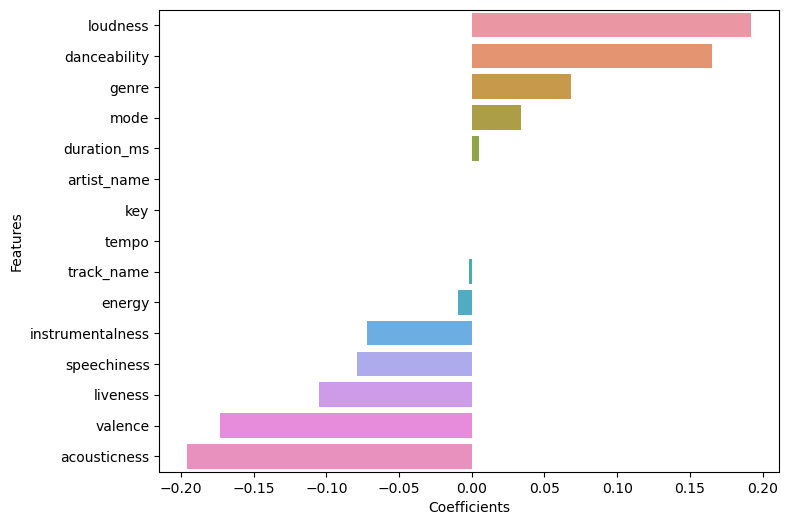

In [34]:
plt.figure(figsize= (8,6))
sn.barplot(x= 'coef', y= 'columns', data= sorted_coef_vals_lasso)
plt.xlabel('Coefficients')
plt.ylabel('Features')

In [35]:
lasso_coefficient_df[lasso_coefficient_df.coef == 0]#features artist_name, key and tempo do not show any
#change in popularity. we can remove these and try to run the model again to check the accuracy

,columns,coef
1,artist_name,0.0
8,key,0.0
13,tempo,-0.0


In [36]:
#applying elastic run 
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha= 1.01, l1_ratio= 0.001, max_iter= 500)
enet.fit(X_train, y_train)
get_train_test_rmse(enet)#elastic run improves the model further and can be considered as the better option
#among all

train 0.894 test 0.899


In [37]:
y_pred = linearig.predict(X_test)

In [39]:
y_pred

array([[ 0.14681748],
       [-0.50458255],
       [ 0.457175  ],
       ...,
       [-0.31417796],
       [ 0.68884646],
       [ 0.20407829]])

In [41]:
test_pred_df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': np.round(y_pred.flatten(), 2),
                            'residuals': y_test.flatten() - y_pred.flatten()})
test_pred_df.sample(10)

,actual,predicted,residuals
40779,-0.611740,0.20,-0.813847
45984,0.542746,0.47,0.074377
5931,-1.381398,0.21,-1.591632
12726,0.322844,0.48,-0.155250
33175,0.927575,0.11,0.814280
45675,0.157917,0.04,0.121056
34802,0.432795,0.19,0.243044
42305,0.102942,0.17,-0.071853
3166,1.037526,-0.03,1.068007
25297,1.092501,0.26,0.832303
